## Проект: Прогнозирование заказов такси

**Dataset Description**

    В данном проекте нам необходимо разработать модель прогнозирования количества заказов такси на следующий час, это прогноз необходим для привлечения дополнительных водителей в периоды пиковых нагрузок.

**Данные**

    `taxi.csv` - данные о количестве заказов.
    
**Описание таблиц данных:**

    `datetime` - данные о времени.
    `num_orders` - количество заказов.
    
**Цели**

    Разработка модели прогнозирования количества заказов такси на следующий час, с метрикой RMSE не более 48.

**Структура проекта:**

<div class="toc"><ul class="toc-item"><li><span><a href="#Проект:-Прогнозирование-заказов-такси" data-toc-modified-id="Проект:-Прогнозирование-заказов-такси-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Проект: Прогнозирование заказов такси</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Промежуточный-вывод-1" data-toc-modified-id="Промежуточный-вывод-1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Промежуточный вывод 1</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-вывод-2" data-toc-modified-id="Промежуточный-вывод-2-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Промежуточный вывод 2</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Промежуточный-вывод-3" data-toc-modified-id="Промежуточный-вывод-3-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Промежуточный вывод 3</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

**Предмет исследования:**

    Исторические данные о заказах в разрезе времени.

**Методы:**

    Загрузка и предобработка данных.
    Ресемплирование.
    Создание моделей машинного обучения.
    Тюнинг гиперпараметров моделей машинного обучения.

**Используемые библитеки:**

    * Pandas
    * Sklearn
    * Optuna
    * Seaborn
    * Numpy
    * Matplotlib
    * Catboost

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

### Импорт библиотек

Для начала импортируем необходимые библиотеки, объявим константы и выполним настройку отображения диаграмм:

In [1]:
! pip install optuna

import pandas as pd
import numpy as np
import seaborn as sns
import optuna
import matplotlib.pyplot as plt

from catboost import CatBoostRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

RANDOM_SEED = 12345

sns.set(rc={'figure.figsize':(20, 7)})

Приступим к загрузке данных:

In [2]:
df = pd.read_csv('/datasets/taxi.csv')

Взглянем на корректность загрузки, проверим первые строки датасета:

In [3]:
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


Данные загружены корректно, ознакомимся с общей информацией о датасете:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Мы имеем, две колонки: 
* `datetime`, тип данных object, пропущенные значения отсутсвуют
* `num_orders`, тип данных int64, пропущенные значения отсутсвуют

Переведем данных в колонке `datetime` к типу 'datetime64'

In [5]:
df['datetime'] = df['datetime'].astype('datetime64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


Зададим индекс типа DatetimeIndex для нашего датасета:

In [6]:
df.index = df['datetime']
df = df.drop('datetime', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Проверим корректность отображения:

In [7]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


### Промежуточный вывод 1

На данном этапе мы импортировали необходимые библиотеки, загрузили данные, привели данные к нужным типам и установили индекс датасета типа DatetimeIndex.

## Анализ

Оценим наши данные на монотонность:

In [8]:
df.index.is_monotonic

True

Отлично данные монотонны, произведем ресемплирование датасета с шагом 1 час.

In [9]:
df = df.resample('1H').sum()

Взглянем на скользящее среднее и скользящее стандартное отклонение:

<AxesSubplot:xlabel='datetime'>

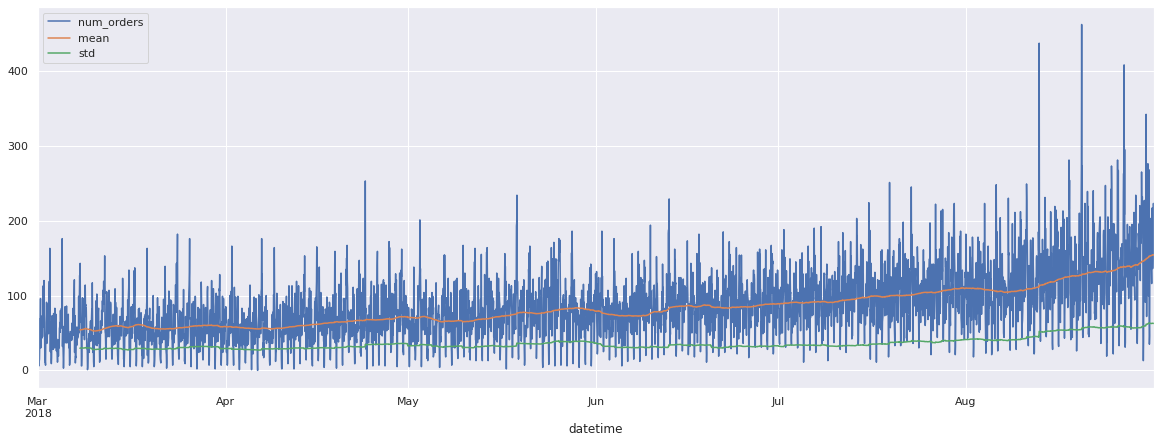

In [10]:
df_stat = df.copy()
df_stat['mean'] = df_stat['num_orders'].rolling(24*7).mean()
df_stat['std'] = df_stat['num_orders'].rolling(24*7).std()
df_stat.plot() 

Мы имеем данные с марта 2018 - август 2018 года, видим постепенное увеличение скользящего среднего и скользящего отклонения.

Взглянем на декомпозиция данных:

In [11]:
decomposed = seasonal_decompose(df)

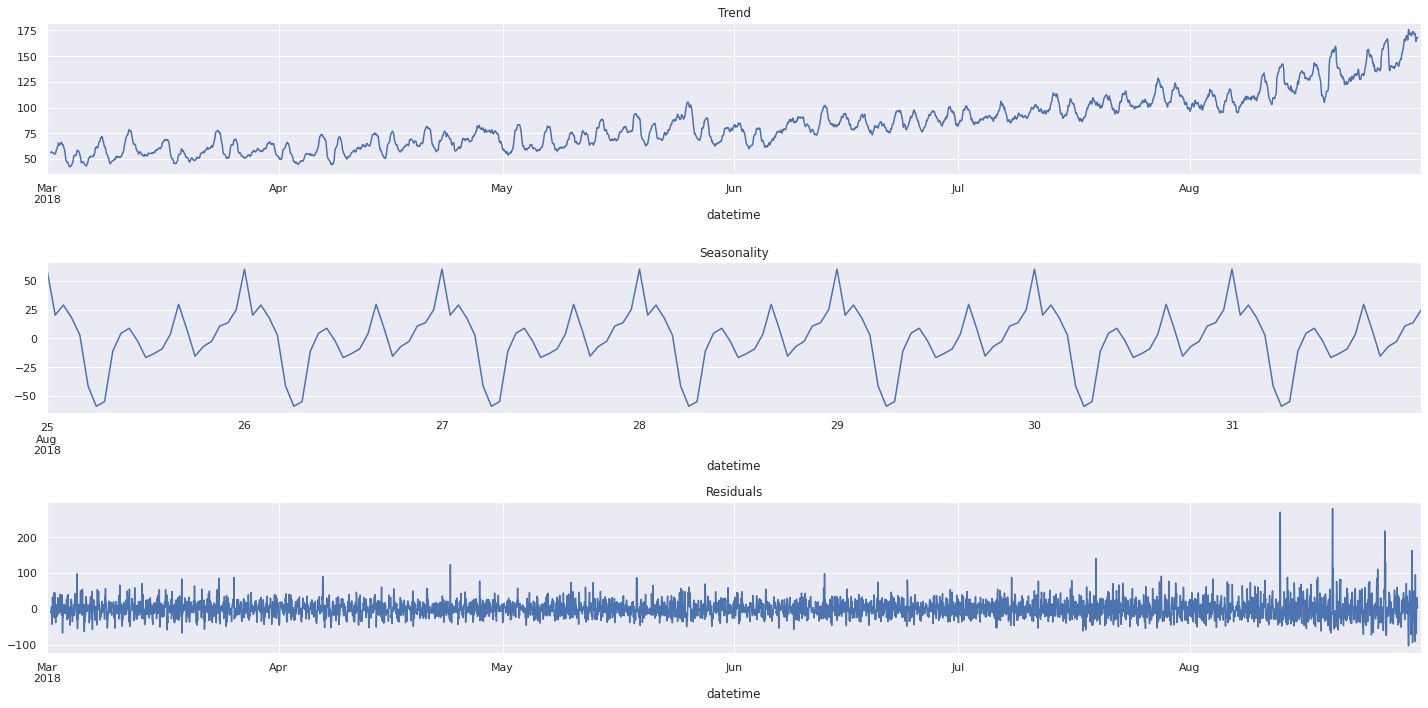

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.tail(24*7).plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid .plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

На графиках декомпозиции отчетливо виден восходящей тренд, а также ярко выраженна сезонность в разрезе суток.

### Промежуточный вывод 2

* На данном этапе проекта мы проверили наши данные на монотонность, проанализировали скользящее среднее и скользящее стандартное отклонение. 
* Декомпозировали данные. 
* Определили что наши данные имеют восходящий тренд и вараженную сезонность в разрезе суток.

## Обучение

Мы будем проверять следующие модели:
* LinearRegression
* DecisionTreeRegressor
* CatBoostRegressor

в качестве целевой метрики будет использована RMSE, для оценки адекватности моделей - будем сравнивать их с моделью без обучения, точнее с моделью которая прогнозирует предыдущими значениями временного ряда.

Разделение данных будем производить на тренировочную и тестовую выборки в пропорции 90:10.

При помощи функции `make_features` выделим новые признаки из датасета.

Подбор гиперпараметров моделей и оптимальный шаг для отстающих значений подбираем при помощи библиотеки optuna.

Для вычисления метрики на тренировочных данных, производим разбиение их на выборки при помощи TimeSeriesSplit и усредняем результаты.

По результатам обучения, выберем наилучшую модель - для финального тестирования на тестовых данных.

Результаты тестирование будут храниться в словаре `score_dict`. Для начала проверим модель которая прогнозирует предыдущими значениями временного ряда:

In [13]:
score_dict = {}

train, test = train_test_split(df, shuffle=False, test_size=0.1, random_state=RANDOM_SEED)

pred_previous = test.shift(periods=1)
pred_previous.iloc[0][0] = train.iloc[-1][0]

score_dict['One_day_predictor'] = mean_squared_error(pred_previous['num_orders'], test['num_orders'], squared=False)

Функция для выделения дополнительных календарных признаков:

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    
    new_data = data.copy()
    
    new_data['month'] = new_data.index.month
    new_data['day'] = new_data.index.day
    new_data['dayofweek'] = new_data.index.dayofweek
    new_data['hour'] = new_data.index.hour
    for lag in range(1, max_lag + 1):
        new_data['lag_{}'.format(lag)] = new_data['num_orders'].shift(lag)

    new_data['rolling_mean'] = new_data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return new_data

### LinearRegression

In [15]:
best_lr_model = None
best_lr_score = 48

def objective(trial):
    
    global best_lr_model, best_lr_score
    
    print('________________START_________________')
    
    
    accuracy = []
    tscv = TimeSeriesSplit(n_splits=4) 
    
    features_df = make_features(df, trial.suggest_int('max_lag', 1, 10), 1)

    train, test = train_test_split(features_df, shuffle=False, test_size=0.1)
    train = train.dropna()
    
    
    param = {}
        
    for train_index, test_index in tscv.split(train):
        
        X_train, y_train = train.iloc[train_index].drop('num_orders', axis=1), train.iloc[train_index].num_orders
        X_test, y_test = train.iloc[test_index].drop('num_orders', axis=1), train.iloc[test_index].num_orders

        model = LinearRegression(**param).fit(X_train, y_train)

        prediction = model.predict(X_test)
    
        accuracy.append(mean_squared_error(y_test, prediction, squared=False))
        
    final_accuracy = np.mean(np.array(accuracy))
    
    if final_accuracy < best_lr_score:
        best_lr_model = model
        best_lr_score = final_accuracy
    
    print('________________STOP__________________')
    
    return final_accuracy


    
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED), pruner=optuna.pruners.MedianPruner(), direction='minimize')
study.optimize(objective, n_trials=10, n_jobs=1)
    
params_lr = study.best_params

score_dict['LinearRegression'] = best_lr_score

[I 2023-05-19 09:56:53,750] A new study created in memory with name: no-name-68c0e13a-3eb5-4ab2-8730-20556e3cfa44


________________START_________________


[I 2023-05-19 09:56:54,313] Trial 0 finished with value: 31.838814545219442 and parameters: {'max_lag': 10}. Best is trial 0 with value: 31.838814545219442.
[I 2023-05-19 09:56:54,520] Trial 1 finished with value: 31.742179807485613 and parameters: {'max_lag': 4}. Best is trial 1 with value: 31.742179807485613.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:54,611] Trial 2 finished with value: 31.85267263998873 and parameters: {'max_lag': 2}. Best is trial 1 with value: 31.742179807485613.
[I 2023-05-19 09:56:54,697] Trial 3 finished with value: 31.74769587753312 and parameters: {'max_lag': 3}. Best is trial 1 with value: 31.742179807485613.
[I 2023-05-19 09:56:54,733] Trial 4 finished with value: 31.886614741839274 and parameters: {'max_lag': 6}. Best is trial 1 with value: 31.742179807485613.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:54,916] Trial 5 finished with value: 31.886614741839274 and parameters: {'max_lag': 6}. Best is trial 1 with value: 31.742179807485613.


________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:55,497] Trial 6 finished with value: 31.838814545219442 and parameters: {'max_lag': 10}. Best is trial 1 with value: 31.742179807485613.


________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:55,900] Trial 7 finished with value: 31.91363093614796 and parameters: {'max_lag': 7}. Best is trial 1 with value: 31.742179807485613.


________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:56,299] Trial 8 finished with value: 31.940969618924257 and parameters: {'max_lag': 8}. Best is trial 1 with value: 31.742179807485613.


________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:56,611] Trial 9 finished with value: 31.91363093614796 and parameters: {'max_lag': 7}. Best is trial 1 with value: 31.742179807485613.


________________STOP__________________


### DecisionTreeRegressor

In [16]:
best_dtc_model = None
best_dtc_score = 48

def objective(trial):
    
    global best_dtc_model, best_dtc_score
    
    print('________________START_________________')
    
    
    accuracy = []
    tscv = TimeSeriesSplit(n_splits=4)
    
    features_df = make_features(df, trial.suggest_int('max_lag', 1, 10), 1)

    train, test = train_test_split(features_df, shuffle=False, test_size=0.1)
    train = train.dropna()
    
    
    param = {
    'max_depth': trial.suggest_int('max_depth', 1, 50),
    'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
    'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
    'max_features': trial.suggest_categorical('max_features', ["auto", "sqrt", "log2", None]),
    'random_state': trial.suggest_int('random_state', 1, 100)
}
        
    for train_index, test_index in tscv.split(train):
        
        X_train, y_train = train.iloc[train_index].drop('num_orders', axis=1), train.iloc[train_index].num_orders
        X_test, y_test = train.iloc[test_index].drop('num_orders', axis=1), train.iloc[test_index].num_orders

        model = DecisionTreeRegressor(**param).fit(X_train, y_train)

        prediction = model.predict(X_test)
    
        accuracy.append(mean_squared_error(y_test, prediction, squared=False))
        
    final_accuracy = np.mean(np.array(accuracy))
    
    if final_accuracy < best_dtc_score:
        best_dtc_model = model
        best_dtc_score = final_accuracy
    
    print('________________STOP__________________')
    
    return final_accuracy

    
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED), pruner=optuna.pruners.MedianPruner(), direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=1)
    
params_dtc = study.best_params

score_dict['DecisionTreeRegressor'] = best_dtc_score

[I 2023-05-19 09:56:56,795] A new study created in memory with name: no-name-7130711b-1020-42d3-982d-353f6320913a


________________START_________________


[I 2023-05-19 09:56:56,850] Trial 0 finished with value: 35.945908824491234 and parameters: {'max_lag': 10, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.2838625145408433, 'max_features': 'sqrt', 'random_state': 66}. Best is trial 0 with value: 35.945908824491234.
[I 2023-05-19 09:56:56,911] Trial 1 finished with value: 34.833647386746975 and parameters: {'max_lag': 8, 'max_depth': 49, 'min_samples_split': 2, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.14935185688469077, 'max_features': None, 'random_state': 73}. Best is trial 1 with value: 34.833647386746975.
[I 2023-05-19 09:56:56,947] Trial 2 finished with value: 37.60757935272681 and parameters: {'max_lag': 7, 'max_depth': 36, 'min_samples_split': 10, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.21982230294240473, 'max_features': 'sqrt', 'random_state': 18}. Best is trial 1 with value: 34.833647386746975.
[I 2023-05-19 09:56:56,980] Trial 3 finished with value: 34.783

________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:57,039] Trial 4 finished with value: 34.4411257532754 and parameters: {'max_lag': 9, 'max_depth': 26, 'min_samples_split': 17, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.10947502186604674, 'max_features': None, 'random_state': 18}. Best is trial 4 with value: 34.4411257532754.


________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:57,082] Trial 5 finished with value: 35.574251009710906 and parameters: {'max_lag': 6, 'max_depth': 9, 'min_samples_split': 16, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.30474682899675176, 'max_features': None, 'random_state': 92}. Best is trial 4 with value: 34.4411257532754.
[I 2023-05-19 09:56:57,134] Trial 6 finished with value: 32.615896842256255 and parameters: {'max_lag': 4, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.06292077191368511, 'max_features': None, 'random_state': 64}. Best is trial 6 with value: 32.615896842256255.
[I 2023-05-19 09:56:57,175] Trial 7 finished with value: 38.72945060770937 and parameters: {'max_lag': 9, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.25196455822395775, 'max_features': 'log2', 'random_state': 92}. Best is trial 6 with value: 32.615896842256255.
[I 2023-05-19 09:56:57,234] Trial 8 finished with value: 34.34385

________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:57,295] Trial 9 finished with value: 31.433500000746594 and parameters: {'max_lag': 8, 'max_depth': 40, 'min_samples_split': 18, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.05366145610052209, 'max_features': 'auto', 'random_state': 5}. Best is trial 9 with value: 31.433500000746594.
[I 2023-05-19 09:56:57,367] Trial 10 finished with value: 28.520416927864268 and parameters: {'max_lag': 3, 'max_depth': 49, 'min_samples_split': 14, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.010326008479363512, 'max_features': 'auto', 'random_state': 3}. Best is trial 10 with value: 28.520416927864268.
[I 2023-05-19 09:56:57,447] Trial 11 finished with value: 28.037861724881623 and parameters: {'max_lag': 3, 'max_depth': 49, 'min_samples_split': 14, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.0032669533887833, 'max_features': 'auto', 'random_state': 2}. Best is trial 11 with value: 28.037861724881623.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:57,527] Trial 12 finished with value: 28.070699164900162 and parameters: {'max_lag': 3, 'max_depth': 49, 'min_samples_split': 14, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.006612320159453924, 'max_features': 'auto', 'random_state': 1}. Best is trial 11 with value: 28.037861724881623.
[I 2023-05-19 09:56:57,609] Trial 13 finished with value: 28.13704812439166 and parameters: {'max_lag': 3, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.005742668190145689, 'max_features': 'auto', 'random_state': 40}. Best is trial 11 with value: 28.037861724881623.
[I 2023-05-19 09:56:57,664] Trial 14 finished with value: 36.39988993997649 and parameters: {'max_lag': 1, 'max_depth': 34, 'min_samples_split': 12, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.3669693301967889, 'max_features': 'auto', 'random_state': 21}. Best is trial 11 with value: 28.037861724881623.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:57,734] Trial 15 finished with value: 34.27630990840528 and parameters: {'max_lag': 4, 'max_depth': 43, 'min_samples_split': 15, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.12165696612037438, 'max_features': 'auto', 'random_state': 49}. Best is trial 11 with value: 28.037861724881623.
[I 2023-05-19 09:56:57,797] Trial 16 finished with value: 38.832087185155785 and parameters: {'max_lag': 2, 'max_depth': 33, 'min_samples_split': 20, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.49026455734834856, 'max_features': 'log2', 'random_state': 3}. Best is trial 11 with value: 28.037861724881623.
[I 2023-05-19 09:56:57,867] Trial 17 finished with value: 32.6800303811943 and parameters: {'max_lag': 5, 'max_depth': 44, 'min_samples_split': 10, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.06533722689593059, 'max_features': 'auto', 'random_state': 29}. Best is trial 11 with value: 28.037861724881623.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:57,950] Trial 18 finished with value: 27.80841736317646 and parameters: {'max_lag': 3, 'max_depth': 46, 'min_samples_split': 13, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.00025080205024678726, 'max_features': 'auto', 'random_state': 11}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,016] Trial 19 finished with value: 33.12836513734827 and parameters: {'max_lag': 2, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.09557688679446792, 'max_features': 'auto', 'random_state': 15}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,077] Trial 20 finished with value: 39.64987880771671 and parameters: {'max_lag': 5, 'max_depth': 1, 'min_samples_split': 12, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.17099623291388202, 'max_features': 'log2', 'random_state': 44}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:58,154] Trial 21 finished with value: 28.6124601423655 and parameters: {'max_lag': 3, 'max_depth': 46, 'min_samples_split': 14, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.010927601908693317, 'max_features': 'auto', 'random_state': 8}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,264] Trial 22 finished with value: 28.30907124521893 and parameters: {'max_lag': 4, 'max_depth': 38, 'min_samples_split': 16, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.004181708739928605, 'max_features': 'auto', 'random_state': 13}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,327] Trial 23 finished with value: 32.16522004582754 and parameters: {'max_lag': 2, 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.05563178750436912, 'max_features': 'auto', 'random_state': 28}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:58,401] Trial 24 finished with value: 37.7497123391211 and parameters: {'max_lag': 6, 'max_depth': 30, 'min_samples_split': 13, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.08690087942145477, 'max_features': 'sqrt', 'random_state': 1}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,480] Trial 25 finished with value: 31.181436082547204 and parameters: {'max_lag': 3, 'max_depth': 47, 'min_samples_split': 17, 'min_samples_leaf': 14, 'min_weight_fraction_leaf': 0.039358834532993395, 'max_features': 'auto', 'random_state': 11}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,550] Trial 26 finished with value: 34.71024083469384 and parameters: {'max_lag': 4, 'max_depth': 41, 'min_samples_split': 15, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.13032870603937916, 'max_features': 'auto', 'random_state': 25}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:58,620] Trial 27 finished with value: 31.1193679736481 and parameters: {'max_lag': 2, 'max_depth': 50, 'min_samples_split': 9, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.03809581621178484, 'max_features': 'auto', 'random_state': 39}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,683] Trial 28 finished with value: 33.14353623525737 and parameters: {'max_lag': 1, 'max_depth': 38, 'min_samples_split': 13, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.09905101037635851, 'max_features': 'auto', 'random_state': 12}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,754] Trial 29 finished with value: 34.25715436865432 and parameters: {'max_lag': 5, 'max_depth': 18, 'min_samples_split': 11, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.0831510880074131, 'max_features': 'sqrt', 'random_state': 57}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:58,827] Trial 30 finished with value: 32.64146977427605 and parameters: {'max_lag': 3, 'max_depth': 46, 'min_samples_split': 6, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.036805683891399085, 'max_features': 'log2', 'random_state': 100}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:58,913] Trial 31 finished with value: 28.050457356359285 and parameters: {'max_lag': 3, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.0058501703901221586, 'max_features': 'auto', 'random_state': 39}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,015] Trial 32 finished with value: 27.879743734313514 and parameters: {'max_lag': 4, 'max_depth': 50, 'min_samples_split': 15, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.0018436791866201952, 'max_features': 'auto', 'random_state': 34}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:59,099] Trial 33 finished with value: 30.838821641433288 and parameters: {'max_lag': 4, 'max_depth': 43, 'min_samples_split': 3, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.03160699683246031, 'max_features': 'auto', 'random_state': 35}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,162] Trial 34 finished with value: 33.49621786549755 and parameters: {'max_lag': 2, 'max_depth': 47, 'min_samples_split': 16, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.07534400974909648, 'max_features': 'sqrt', 'random_state': 51}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,270] Trial 35 finished with value: 31.323167431572127 and parameters: {'max_lag': 5, 'max_depth': 42, 'min_samples_split': 18, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.034916969639334716, 'max_features': 'auto', 'random_state': 21}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:59,343] Trial 36 finished with value: 34.515414249519836 and parameters: {'max_lag': 6, 'max_depth': 21, 'min_samples_split': 15, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.11640265251880696, 'max_features': 'auto', 'random_state': 23}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,408] Trial 37 finished with value: 34.90651092167526 and parameters: {'max_lag': 4, 'max_depth': 47, 'min_samples_split': 13, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.13781386637114273, 'max_features': 'sqrt', 'random_state': 61}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,481] Trial 38 finished with value: 31.719084968096062 and parameters: {'max_lag': 7, 'max_depth': 39, 'min_samples_split': 17, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.0643708146556265, 'max_features': 'auto', 'random_state': 75}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:59,555] Trial 39 finished with value: 30.330695660700705 and parameters: {'max_lag': 1, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.02641893618840645, 'max_features': None, 'random_state': 36}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,624] Trial 40 finished with value: 34.16279748071636 and parameters: {'max_lag': 3, 'max_depth': 44, 'min_samples_split': 19, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.1550476412635232, 'max_features': 'auto', 'random_state': 48}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,704] Trial 41 finished with value: 28.055896281430144 and parameters: {'max_lag': 3, 'max_depth': 48, 'min_samples_split': 14, 'min_samples_leaf': 14, 'min_weight_fraction_leaf': 0.0063433204506911905, 'max_features': 'auto', 'random_state': 8}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:56:59,785] Trial 42 finished with value: 28.460299829832415 and parameters: {'max_lag': 4, 'max_depth': 47, 'min_samples_split': 12, 'min_samples_leaf': 14, 'min_weight_fraction_leaf': 0.005940485282366851, 'max_features': 'auto', 'random_state': 8}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,856] Trial 43 finished with value: 32.19979717214985 and parameters: {'max_lag': 2, 'max_depth': 36, 'min_samples_split': 16, 'min_samples_leaf': 14, 'min_weight_fraction_leaf': 0.05736932997167354, 'max_features': 'auto', 'random_state': 17}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:56:59,940] Trial 44 finished with value: 27.925278940349127 and parameters: {'max_lag': 3, 'max_depth': 48, 'min_samples_split': 13, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.002435414956190054, 'max_features': None, 'random_state': 7}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:00,031] Trial 45 finished with value: 31.568224236108716 and parameters: {'max_lag': 4, 'max_depth': 50, 'min_samples_split': 13, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.04895406384267698, 'max_features': None, 'random_state': 31}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:00,126] Trial 46 finished with value: 30.34798843326002 and parameters: {'max_lag': 3, 'max_depth': 41, 'min_samples_split': 15, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.02754003178348855, 'max_features': None, 'random_state': 74}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:00,208] Trial 47 finished with value: 32.579196908133746 and parameters: {'max_lag': 2, 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.07265619089559071, 'max_features': None, 'random_state': 18}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:00,285] Trial 48 finished with value: 33.72370881965648 and parameters: {'max_lag': 5, 'max_depth': 49, 'min_samples_split': 12, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.10141083412378132, 'max_features': None, 'random_state': 44}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:00,370] Trial 49 finished with value: 27.925278940349127 and parameters: {'max_lag': 3, 'max_depth': 44, 'min_samples_split': 15, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.0005314965078155576, 'max_features': None, 'random_state': 7}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:00,463] Trial 50 finished with value: 30.60729061575563 and parameters: {'max_lag': 4, 'max_depth': 30, 'min_samples_split': 18, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.026249449759613488, 'max_features': None, 'random_state': 6}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:00,560] Trial 51 finished with value: 27.901501506202294 and parameters: {'max_lag': 3, 'max_depth': 44, 'min_samples_split': 15, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.0027990624013922065, 'max_features': None, 'random_state': 11}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:00,649] Trial 52 finished with value: 27.901501506202294 and parameters: {'max_lag': 3, 'max_depth': 43, 'min_samples_split': 15, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.001535777552572058, 'max_features': None, 'random_state': 10}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:00,723] Trial 53 finished with value: 31.764787889368932 and parameters: {'max_lag': 2, 'max_depth': 43, 'min_samples_split': 17, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.052500048100110525, 'max_features': None, 'random_state': 12}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:00,818] Trial 54 finished with value: 29.908584277719264 and parameters: {'max_lag': 4, 'max_depth': 37, 'min_samples_split': 16, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.02152782388337637, 'max_features': None, 'random_state': 6}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:00,911] Trial 55 finished with value: 30.000541095947508 and parameters: {'max_lag': 3, 'max_depth': 40, 'min_samples_split': 15, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.02198715876710169, 'max_features': None, 'random_state': 15}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:00,980] Trial 56 finished with value: 32.02076659480606 and parameters: {'max_lag': 1, 'max_depth': 34, 'min_samples_split': 13, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.05469097533712326, 'max_features': None, 'random_state': 26}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:01,058] Trial 57 finished with value: 32.68568692767351 and parameters: {'max_lag': 2, 'max_depth': 42, 'min_samples_split': 16, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.0752946129407363, 'max_features': None, 'random_state': 20}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:01,156] Trial 58 finished with value: 29.50256937653788 and parameters: {'max_lag': 3, 'max_depth': 45, 'min_samples_split': 15, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 8.89299243548127e-05, 'max_features': None, 'random_state': 10}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:01,261] Trial 59 finished with value: 31.411028173109514 and parameters: {'max_lag': 2, 'max_depth': 40, 'min_samples_split': 14, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.04661841185864146, 'max_features': None, 'random_state': 4}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:01,338] Trial 60 finished with value: 30.879207633363986 and parameters: {'max_lag': 3, 'max_depth': 36, 'min_samples_split': 18, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.017333705958594244, 'max_features': 'log2', 'random_state': 17}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:01,435] Trial 61 finished with value: 28.037861724881623 and parameters: {'max_lag': 3, 'max_depth': 48, 'min_samples_split': 14, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.0028864531537595934, 'max_features': None, 'random_state': 1}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:01,548] Trial 62 finished with value: 30.28833200163902 and parameters: {'max_lag': 10, 'max_depth': 44, 'min_samples_split': 15, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.021402031599495386, 'max_features': None, 'random_state': 15}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:01,628] Trial 63 finished with value: 31.37492214317599 and parameters: {'max_lag': 4, 'max_depth': 46, 'min_samples_split': 12, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.039343983807652146, 'max_features': None, 'random_state': 4}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:01,706] Trial 64 finished with value: 33.460419798538794 and parameters: {'max_lag': 3, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.09093541662708994, 'max_features': 'log2', 'random_state': 9}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:01,812] Trial 65 finished with value: 28.379517918628416 and parameters: {'max_lag': 4, 'max_depth': 48, 'min_samples_split': 16, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.0004847319336423474, 'max_features': None, 'random_state': 1}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:01,902] Trial 66 finished with value: 32.4102768986401 and parameters: {'max_lag': 3, 'max_depth': 45, 'min_samples_split': 14, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.06633211652269604, 'max_features': None, 'random_state': 11}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:01,972] Trial 67 finished with value: 32.07497625966337 and parameters: {'max_lag': 2, 'max_depth': 42, 'min_samples_split': 17, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.017844110159541817, 'max_features': 'sqrt', 'random_state': 14}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:02,063] Trial 68 finished with value: 31.617465718799686 and parameters: {'max_lag': 5, 'max_depth': 48, 'min_samples_split': 13, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.04554830641280623, 'max_features': None, 'random_state': 5}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:02,148] Trial 69 finished with value: 33.618924874343925 and parameters: {'max_lag': 9, 'max_depth': 46, 'min_samples_split': 15, 'min_samples_leaf': 14, 'min_weight_fraction_leaf': 0.03761953276144398, 'max_features': 'log2', 'random_state': 82}. Best is trial 18 with value: 27.80841736317646.
[I 2023-05-19 09:57:02,248] Trial 70 finished with value: 29.044514852580637 and parameters: {'max_lag': 4, 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.017578888852366168, 'max_features': 'auto', 'random_state': 24}. Best is trial 18 with value: 27.80841736317646.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:02,337] Trial 71 finished with value: 27.786033367891662 and parameters: {'max_lag': 3, 'max_depth': 48, 'min_samples_split': 14, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.001960921499151728, 'max_features': None, 'random_state': 2}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:02,424] Trial 72 finished with value: 28.890686871582204 and parameters: {'max_lag': 3, 'max_depth': 44, 'min_samples_split': 14, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.016872414888792122, 'max_features': None, 'random_state': 8}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:02,517] Trial 73 finished with value: 27.786033367891662 and parameters: {'max_lag': 3, 'max_depth': 49, 'min_samples_split': 13, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.0007170524911401946, 'max_features': None, 'random_state': 4}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:02,604] Trial 74 finished with value: 30.729759879605353 and parameters: {'max_lag': 3, 'max_depth': 49, 'min_samples_split': 13, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.03270296528057344, 'max_features': None, 'random_state': 4}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:02,686] Trial 75 finished with value: 28.133249584988146 and parameters: {'max_lag': 2, 'max_depth': 47, 'min_samples_split': 12, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.0007764498602313733, 'max_features': None, 'random_state': 12}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:02,773] Trial 76 finished with value: 31.52794847388784 and parameters: {'max_lag': 4, 'max_depth': 50, 'min_samples_split': 16, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.04359688908557191, 'max_features': None, 'random_state': 6}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:02,856] Trial 77 finished with value: 32.769865003970494 and parameters: {'max_lag': 3, 'max_depth': 46, 'min_samples_split': 15, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.08156864901041713, 'max_features': None, 'random_state': 17}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:02,932] Trial 78 finished with value: 32.41773791822632 and parameters: {'max_lag': 2, 'max_depth': 43, 'min_samples_split': 14, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.06439291926724389, 'max_features': None, 'random_state': 19}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:03,021] Trial 79 finished with value: 29.03946686444182 and parameters: {'max_lag': 4, 'max_depth': 39, 'min_samples_split': 13, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.013217101110656042, 'max_features': None, 'random_state': 22}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:03,089] Trial 80 finished with value: 33.28522945082112 and parameters: {'max_lag': 3, 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.02681376295774891, 'max_features': 'sqrt', 'random_state': 10}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:03,173] Trial 81 finished with value: 28.825089515484983 and parameters: {'max_lag': 3, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.012558180485488096, 'max_features': 'auto', 'random_state': 1}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:03,255] Trial 82 finished with value: 28.301135050838674 and parameters: {'max_lag': 2, 'max_depth': 45, 'min_samples_split': 17, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.0005993914693273805, 'max_features': 'auto', 'random_state': 7}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:03,335] Trial 83 finished with value: 31.09403604753853 and parameters: {'max_lag': 3, 'max_depth': 49, 'min_samples_split': 15, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.033749342617076884, 'max_features': None, 'random_state': 3}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:03,415] Trial 84 finished with value: 32.35958845865446 and parameters: {'max_lag': 4, 'max_depth': 47, 'min_samples_split': 12, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.05595590041846025, 'max_features': 'auto', 'random_state': 13}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:03,490] Trial 85 finished with value: 30.531202112834002 and parameters: {'max_lag': 3, 'max_depth': 43, 'min_samples_split': 15, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.029799151726968644, 'max_features': None, 'random_state': 3}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:03,585] Trial 86 finished with value: 29.484668208128795 and parameters: {'max_lag': 7, 'max_depth': 49, 'min_samples_split': 14, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.01711384934837417, 'max_features': 'auto', 'random_state': 10}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:03,665] Trial 87 finished with value: 31.26545324496675 and parameters: {'max_lag': 2, 'max_depth': 46, 'min_samples_split': 12, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.04595888506578549, 'max_features': None, 'random_state': 7}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:03,746] Trial 88 finished with value: 30.348016497831672 and parameters: {'max_lag': 3, 'max_depth': 44, 'min_samples_split': 16, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.029430173599647214, 'max_features': None, 'random_state': 14}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:03,836] Trial 89 finished with value: 28.846960842715895 and parameters: {'max_lag': 4, 'max_depth': 48, 'min_samples_split': 13, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.01086991958651093, 'max_features': 'auto', 'random_state': 1}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:03,917] Trial 90 finished with value: 28.873220289845257 and parameters: {'max_lag': 2, 'max_depth': 41, 'min_samples_split': 14, 'min_samples_leaf': 13, 'min_weight_fraction_leaf': 0.012298668146062773, 'max_features': None, 'random_state': 53}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:04,014] Trial 91 finished with value: 28.037861724881623 and parameters: {'max_lag': 3, 'max_depth': 48, 'min_samples_split': 15, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.0003345115912487921, 'max_features': None, 'random_state': 1}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:04,101] Trial 92 finished with value: 28.603222883331945 and parameters: {'max_lag': 3, 'max_depth': 50, 'min_samples_split': 14, 'min_samples_leaf': 20, 'min_weight_fraction_leaf': 0.010439936833835265, 'max_features': None, 'random_state': 5}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:04,179] Trial 93 finished with value: 30.360331836946834 and parameters: {'max_lag': 3, 'max_depth': 47, 'min_samples_split': 2, 'min_samples_leaf': 19, 'min_weight_fraction_leaf': 0.025626494836373474, 'max_features': None, 'random_state': 9}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:04,266] Trial 94 finished with value: 27.786033367891662 and parameters: {'max_lag': 3, 'max_depth': 49, 'min_samples_split': 13, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.0004541511910042476, 'max_features': None, 'random_state': 68}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:04,342] Trial 95 finished with value: 31.01930291852824 and parameters: {'max_lag': 2, 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 18, 'min_weight_fraction_leaf': 0.040310396083712306, 'max_features': None, 'random_state': 60}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:04,418] Trial 96 finished with value: 33.27789991463064 and parameters: {'max_lag': 4, 'max_depth': 42, 'min_samples_split': 13, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.05602027071214451, 'max_features': 'sqrt', 'random_state': 84}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:04,509] Trial 97 finished with value: 29.64960983609389 and parameters: {'max_lag': 3, 'max_depth': 49, 'min_samples_split': 13, 'min_samples_leaf': 12, 'min_weight_fraction_leaf': 0.019657833905867294, 'max_features': 'auto', 'random_state': 69}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________
________________STOP__________________
________________START_________________


[I 2023-05-19 09:57:04,581] Trial 98 finished with value: 32.57872078456007 and parameters: {'max_lag': 4, 'max_depth': 46, 'min_samples_split': 16, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.010784765381359349, 'max_features': 'log2', 'random_state': 69}. Best is trial 71 with value: 27.786033367891662.
[I 2023-05-19 09:57:04,666] Trial 99 finished with value: 31.12733777925323 and parameters: {'max_lag': 3, 'max_depth': 50, 'min_samples_split': 12, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.034800504314560915, 'max_features': None, 'random_state': 44}. Best is trial 71 with value: 27.786033367891662.


________________STOP__________________
________________START_________________
________________STOP__________________


### CatBoostRegressor

In [34]:
%time

best_cbr_model = None
best_cbr_score = 48

def objective(trial):
    
    global best_cbr_model, best_cbr_score
    
    print('________________START_________________')
    
    
    accuracy = []
    tscv = TimeSeriesSplit(n_splits=4) 
    
    features_df = make_features(df, trial.suggest_int('max_lag', 1, 10), 1)
    
    train, test = train_test_split(features_df, shuffle=False, test_size=0.1)
    train = train.dropna()
    
    
    param = {
    'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
    'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
    'depth': trial.suggest_int('depth', 3, 12)
}
        
    for train_index, test_index in tscv.split(train):
        
        X_train, y_train = train.iloc[train_index].drop('num_orders', axis=1), train.iloc[train_index].num_orders
        X_test, y_test = train.iloc[test_index].drop('num_orders', axis=1), train.iloc[test_index].num_orders

        model = CatBoostRegressor(**param, silent=True).fit(X_train, y_train)

        prediction = model.predict(X_test)
    
        accuracy.append(mean_squared_error(y_test, prediction, squared=False))
        
    final_accuracy = np.mean(np.array(accuracy))
    
    if final_accuracy < best_cbr_score:
        best_cbr_model = model
        best_cbr_score = final_accuracy
    
    print('________________STOP__________________')
    
    return final_accuracy

    
study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=RANDOM_SEED), pruner=optuna.pruners.MedianPruner(), direction='minimize')
study.optimize(objective, n_trials=10, n_jobs=1)
    
params_cbr = study.best_params

score_dict['CatBoostRegressor'] = best_cbr_score

[I 2023-05-19 10:04:52,378] A new study created in memory with name: no-name-bb5c3bcd-c0be-4f36-bc6b-684e1b44fab4


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
________________START_________________


Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2023-05-19 10:04:57,004] Trial 0 finished with value: 26.689713089555273 and parameters: {'max_lag': 10, 'iterations': 400, 'learning_rate': 0.01920796235603235, 'depth': 5}. Best is trial 0 with value: 26.689713089555273.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:05:17,664] Trial 1 finished with value: 27.107222977332327 and parameters: {'max_lag': 6, 'iterations': 600, 'learning_rate': 0.09648693745382654, 'depth': 9}. Best is trial 0 with value: 26.689713089555273.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:08:03,562] Trial 2 finished with value: 27.9694226655171 and parameters: {'max_lag': 8, 'iterations': 700, 'learning_rate': 0.07502376611785612, 'depth': 12}. Best is trial 0 with value: 26.689713089555273.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:08:07,750] Trial 3 finished with value: 27.938355502145903 and parameters: {'max_lag': 1, 'iterations': 200, 'learning_rate': 0.030571667663168774, 'depth': 9}. Best is trial 0 with value: 26.689713089555273.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:09:08,881] Trial 4 finished with value: 27.00334089390718 and parameters: {'max_lag': 9, 'iterations': 900, 'learning_rate': 0.0965001121398211, 'depth': 10}. Best is trial 0 with value: 26.689713089555273.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:09:16,791] Trial 5 finished with value: 25.828273794994843 and parameters: {'max_lag': 7, 'iterations': 800, 'learning_rate': 0.047292301714710355, 'depth': 6}. Best is trial 5 with value: 25.828273794994843.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:09:39,702] Trial 6 finished with value: 27.285157414877197 and parameters: {'max_lag': 5, 'iterations': 800, 'learning_rate': 0.09940744400409623, 'depth': 9}. Best is trial 5 with value: 25.828273794994843.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:10:04,846] Trial 7 finished with value: 35.068505223139155 and parameters: {'max_lag': 8, 'iterations': 200, 'learning_rate': 0.0036580783032036214, 'depth': 11}. Best is trial 5 with value: 25.828273794994843.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:10:09,851] Trial 8 finished with value: 27.456613957038066 and parameters: {'max_lag': 10, 'iterations': 100, 'learning_rate': 0.04968298452614271, 'depth': 8}. Best is trial 5 with value: 25.828273794994843.


________________STOP__________________
________________START_________________


[I 2023-05-19 10:10:16,530] Trial 9 finished with value: 27.531384282983925 and parameters: {'max_lag': 6, 'iterations': 100, 'learning_rate': 0.0896138632773382, 'depth': 10}. Best is trial 5 with value: 25.828273794994843.


________________STOP__________________


In [18]:
pd.DataFrame(list(score_dict.items()), columns=['model', 'score']).sort_values('score')

,model,score
3,CatBoostRegressor,25.828274
2,DecisionTreeRegressor,27.786033
1,LinearRegression,31.742180
0,One_day_predictor,58.856486


По данным обучения и тестирования наилучшую метрику показала модель CatBoostRegressor с результатом метрики RMSE 25.82, с параметрами:
* 'max_lag': 7
* 'iterations': 800
* 'learning_rate': 0.047292301714710355
* 'depth': 6

Все модели показали метрику лучше One_day_predictor.

### Промежуточный вывод 3

В данной части проекта мы сравнили несколько моделей на тренировочной выборке и выбрали наилучшую.

По данным обучения наилучшую метрику показала модель CatBoostRegressor.

## Тестирование

In [30]:
features_df = df.copy()

new_data = make_features(features_df, 7, 1)

train, test = train_test_split(new_data, shuffle=False, test_size=0.1)

X_train, y_train = train.drop('num_orders', axis=1), train.num_orders
X_test, y_test = test.drop('num_orders', axis=1), test.num_orders

best_cbr_model.fit(X_train, y_train)

prediction = best_cbr_model.predict(X_test)

accurucy = mean_squared_error(y_test, prediction, squared=False)

print(accurucy)

42.90354488477819


In [33]:
best_cbr_model

При пороведении финального тестирования модель CatBoostRegressor показала метрику RMSE 42.90, что удовлетворяет поставленной задаче.

Взглянем как графически отличаются целевые и предсказанные значения:

In [24]:
pred_frame = pd.DataFrame(prediction, index=y_test.index, columns=['predictions'])
real_frame = pd.DataFrame()
real_frame['real'] = y_test
final_frame = real_frame.merge(pred_frame, left_index=True, right_index=True)

<AxesSubplot:xlabel='datetime'>

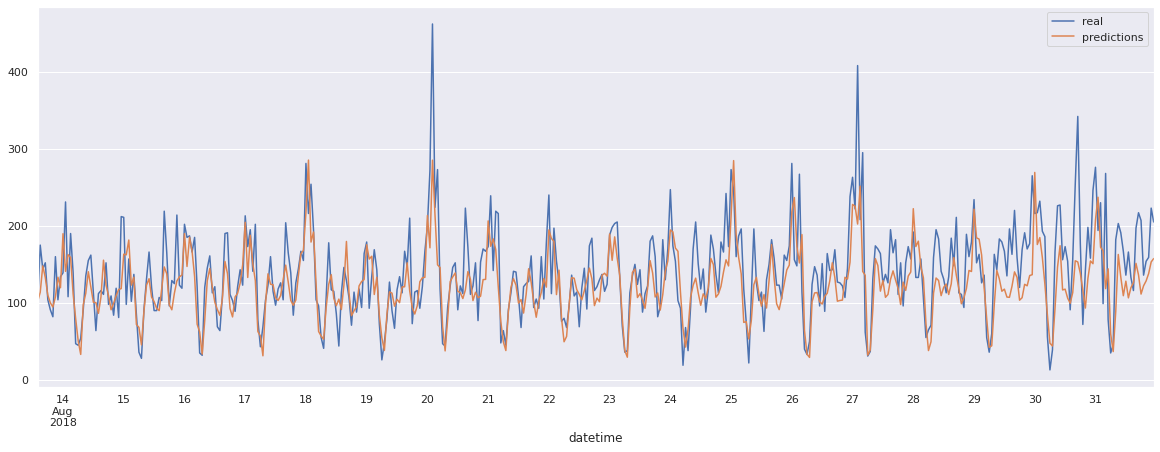

In [25]:
final_frame.plot()

Судя по диаграме модель хорошо понимает данные:

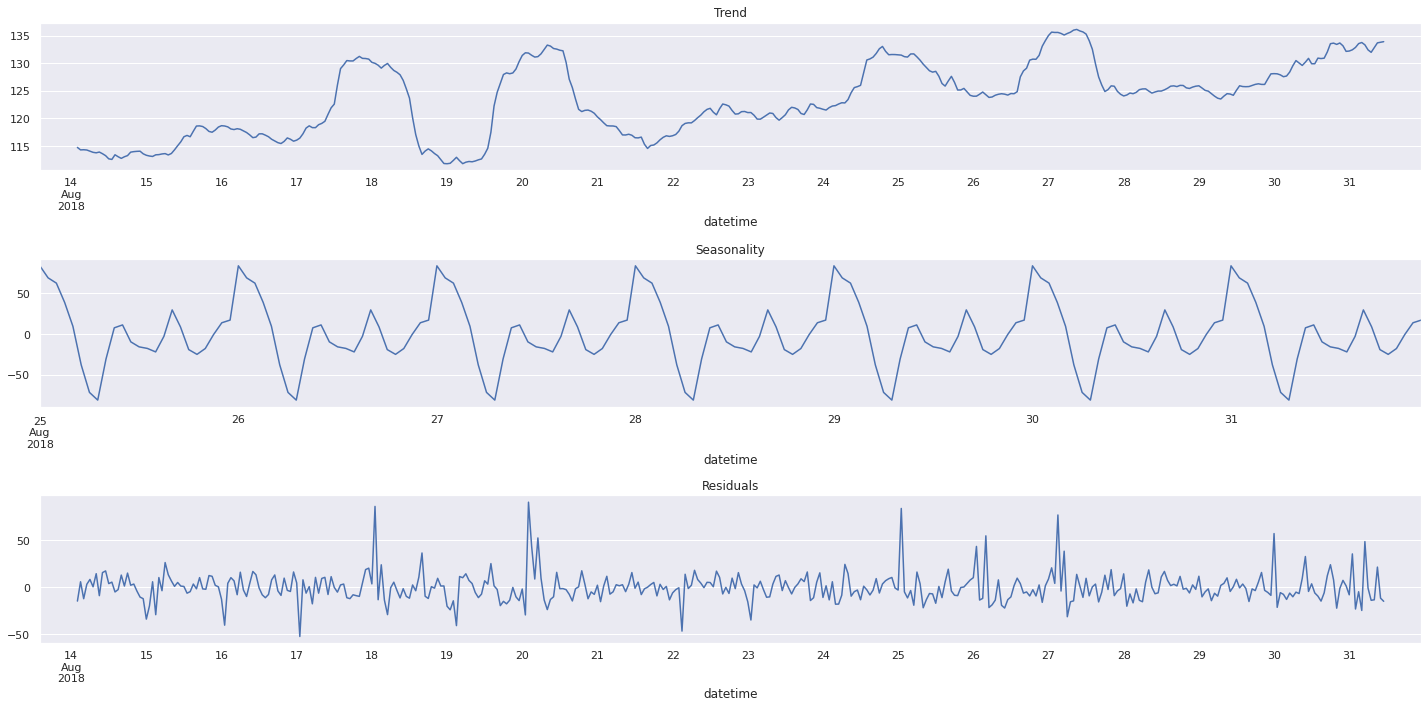

In [26]:
decomposed = seasonal_decompose(final_frame['predictions'])

plt.figure(figsize=(20, 10))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.tail(24*7).plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid .plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Модель также уловила сезонность в течении суток и общий восходящий тренд.

### Общий вывод

В начале данного проекта мы импортировали необходимые библиотеки, загрузили данные, привели данные к нужным типам и установили индекс датасета типа DatetimeIndex.

На следующем этапе:
* Мы проверили наши данные на монотонность, проанализировали скользящее среднее и скользящее стандартное отклонение. 
* Декомпозировали данные. 
* Определили что наши данные имеют восходящий тренд и вараженную сезонность в разрезе суток.

Разделение данных будем произвели на тренировочную и тестовую выборки в пропорции 90:10.

При помощи функции `make_features` выделили новые признаки из датасета.

Мы проверили следующие модели:
* LinearRegression
* DecisionTreeRegressor
* CatBoostRegressor

в качестве целевой метрики использована RMSE, для оценки адекватности моделей - сравниваем их с моделью без обучения, точнее с моделью которая прогнозирует предыдущими значениями временного ряда.

Подбор гиперпараметров моделей и оптимальный шаг для отстающих значений подбирали при помощи библиотеки optuna.

Для вычисления метрики на тренировочных данных, производили разбиение их на выборки при помощи TimeSeriesSplit и усредняли результаты.


По данным обучения и тестирования наилучшую метрику показала модель CatBoostRegressor с результатом метрики RMSE 25.82, с параметрами:
* 'max_lag': 7
* 'iterations': 800
* 'learning_rate': 0.047292301714710355
* 'depth': 6

Все модели показали метрику лучше One_day_predictor.

При пороведении финального тестирования модель CatBoostRegressor показала метрику RMSE 42.90, что удовлетворяет поставленной задаче.

Графический анализ фактических и прогнозируемых значений показал что модель поняля общий тренд и суточную сезонность.